In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Step 1: Load the data
data = pd.read_excel("/content/1553768847_housing.xlsx")
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


In [7]:
# Step 2: Handle missing values
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
data.fillna(data.mean(), inplace=True)

<ipython-input-8-a20208f658ce>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [9]:


# Step 3: Encode categorical data
data = pd.get_dummies(data, columns=["ocean_proximity"])

# Step 4: Split the dataset
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:

# Step 6: Perform Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
print("Linear Regression RMSE:", lr_rmse)

# Step 7: Perform Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
print("Decision Tree Regression RMSE:", dt_rmse)


Linear Regression RMSE: 70031.41991955663
Decision Tree Regression RMSE: 68939.95314598488


In [11]:

# Step 8: Perform Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Random Forest Regression RMSE:", rf_rmse)


Random Forest Regression RMSE: 49184.63016551635


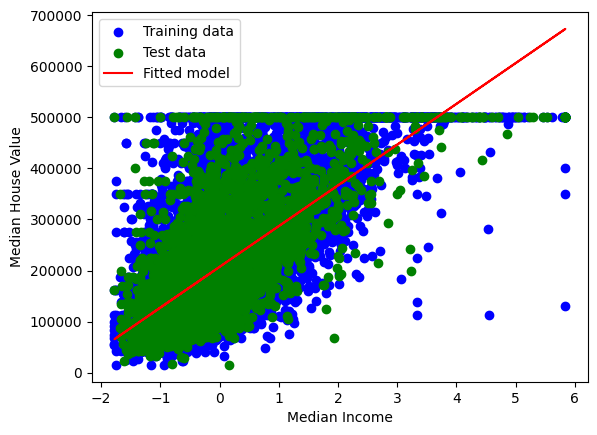

In [12]:
# Step 9: Bonus - Linear Regression with one independent variable
X_train_median_income = X_train_scaled[:, X.columns.get_loc("median_income")]
X_test_median_income = X_test_scaled[:, X.columns.get_loc("median_income")]

lr_model_median_income = LinearRegression()
lr_model_median_income.fit(X_train_median_income.reshape(-1, 1), y_train)

plt.scatter(X_train_median_income, y_train, color="blue", label="Training data")
plt.scatter(X_test_median_income, y_test, color="green", label="Test data")
plt.plot(X_test_median_income, lr_model_median_income.predict(X_test_median_income.reshape(-1, 1)), color="red", label="Fitted model")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()
